This is a toy example of the use of Ball Mapper. We will start by constructing a collection of points sampled from a unit circle.

This notebook was prepared by Davide Gurnari. 

In [1]:
# uncomment and run this if you are on colab
# !pip install pyballmapper

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline

## Generate data

In [3]:
pointcloud = np.array([[np.cos(x), np.sin(x)] for x in np.arange(0, 6.3, 0.1)])
points_df = pd.DataFrame(pointcloud, columns=['x', 'y'])
points_df.head()

,x,y
0,1.000000,0.000000
1,0.995004,0.099833
2,0.980067,0.198669
3,0.955336,0.295520
4,0.921061,0.389418


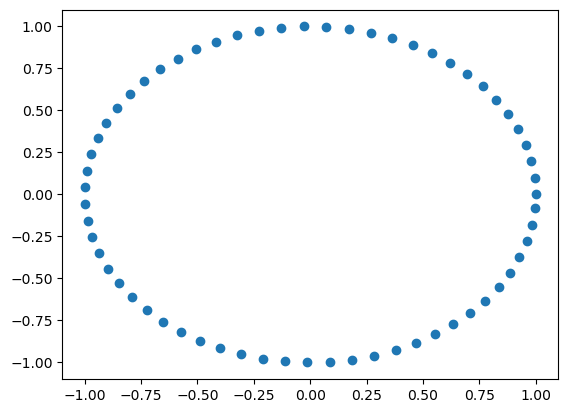

In [4]:
plt.scatter(points_df.x, points_df.y)

## Create BallMapper graph

In [5]:
from pyballmapper import BallMapper

In [21]:
bm = BallMapper(X = points_df.values, # the pointcloud, as a numpy array
                knn = 5,
                dbg=True)            # the radius of the balls

Finding vertices...


  0%|          | 0/63 [00:00<?, ?it/s]

Finding edges...


0it [00:00, ?it/s]

Creating Ball Mapper graph...
Done


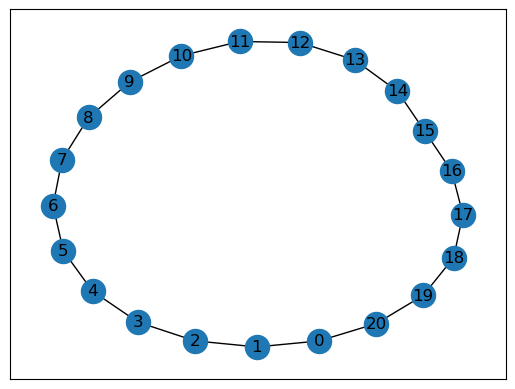

In [22]:
# bm.Graph is a networkx graph
nx.draw_networkx(bm.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=24))

In [23]:
bm.Graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20))

In [25]:
# each node stores the indices of the points inside it
print(bm.points_covered_by_landmarks[0])
print(bm.points_covered_by_landmarks[20])

[ 0 62  1 61  2]
[60 59 61 58 62]


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Fancy visualizations using Bokeh
https://docs.bokeh.org/en/latest/docs/installation.html

In [26]:
from pyballmapper.plotting import graph_GUI

In [27]:
from bokeh.plotting import figure, show, output_file, save

In [28]:
# create a GUI with input our BM graph, 
# we need color palette 
my_red_palette = cm.get_cmap(name='Reds')

# and a dataframe with coloring functions (one value per point in the pointcloud)
# we use the points themself as coloring functions
bm.add_coloring(coloring_df=points_df)
my_fancy_gui = graph_GUI(bm.Graph, my_red_palette, tooltips_variables=['x','y'])
my_fancy_gui.color_by_variable('y')

color by variable y 
MIN_VALUE: -0.986, MAX_VALUE: 0.988


(-0.9862311514641755, 0.9875482631007364)

In [29]:
# creates an html file with the graph 
# and opens it in another tab
show(my_fancy_gui.plot)

In [19]:
# if you are on colab
# save the output html and download it  
output_file("circle_BM.html")
save(my_fancy_gui.plot)

'/Users/dgurnari/GitHub/pyBallMapper/notebooks/circle_BM.html'